In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_yds_salary_18-19')

In [3]:
qbs.dtypes

NAME         object
YDS           int64
YDS_rank    float64
salary        int64
dtype: object

In [4]:
qbs.head()

,NAME,YDS,YDS_rank,salary
0,Ben Roethlisberger,5129,1.0,21850000
1,Patrick Mahomes,5097,2.0,4106447
2,Matt Ryan,4924,3.0,30000000
3,Jared Goff,4688,4.0,6984418
4,Andrew Luck,4593,5.0,24594000


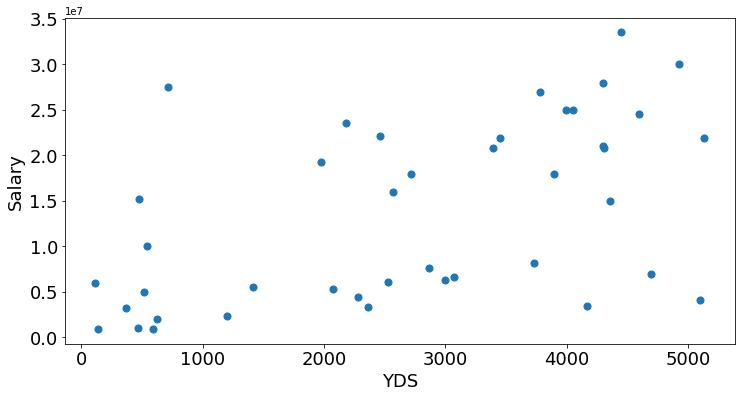

In [5]:
ax = qbs.plot(kind="scatter", x = 'YDS',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('YDS', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(qbs.loc[:, ['YDS', 'salary']])

In [7]:
X.mean(axis = 0)

array([ 7.93016446e-17, -8.72318091e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-1.34013976, -1.02612165],
       [ 0.94241107,  1.10999795],
       [ 1.07582937, -0.62983535],
       [-0.53218247,  0.67860599],
       [-0.0719737 , -0.82426029]])

In [11]:
km.predict(X)

array([1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 4, 4, 4, 3,
       3, 4, 3, 4, 4, 3, 4, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [12]:
qbs['clusters'] = km.labels_
qbs.head()

,NAME,YDS,YDS_rank,salary,clusters
0,Ben Roethlisberger,5129,1.0,21850000,1
1,Patrick Mahomes,5097,2.0,4106447,2
2,Matt Ryan,4924,3.0,30000000,1
3,Jared Goff,4688,4.0,6984418,2
4,Andrew Luck,4593,5.0,24594000,1


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[5.97700000e+02, 3.70214420e+06],
       [4.19569231e+03, 2.44166538e+07],
       [4.40600000e+03, 7.54503600e+06],
       [1.87128571e+03, 2.02333333e+07],
       [2.59671429e+03, 5.65964657e+06]])

In [14]:
qbs.groupby('clusters')[['YDS', 'salary']].mean()

,YDS,salary
clusters,,
0,597.700000,3.702144e+06
1,4195.692308,2.441665e+07
2,4406.000000,7.545036e+06
3,1871.285714,2.023333e+07
4,2596.714286,5.659647e+06


In [15]:
centroids = qbs.groupby('clusters')[['YDS', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

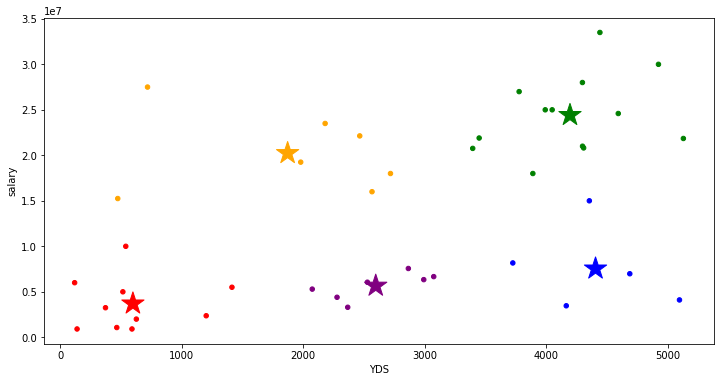

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
qbs['color'] = qbs['clusters'].map(lambda p: colors[p])

ax = qbs.plot(    
    kind = 'scatter', 
    x = 'YDS', y = 'salary',
    figsize = (12,6),
    c = qbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'YDS', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

10.179281146992453

In [18]:
silhouette_score(X, km.labels_)

0.4977800693169524